In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("wine_data.csv", usecols = [0,1,2], header = None)
df.columns = ['Class label', 'Alchohol', 'Malic acid']

In [5]:
df.head()

,Class label,Alchohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alchohol', ylabel='Malic acid'>

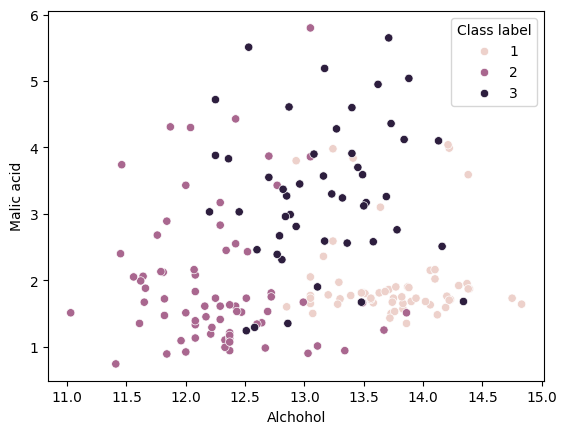

In [6]:
sns.scatterplot(data = df, x= 'Alchohol', y = 'Malic acid', hue = 'Class label')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis = 1), df['Class label'], test_size = 0.3, random_state = 0)

In [11]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [18]:
np.round(X_train_scaled.describe(), 1)

,Alchohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [20]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7592592592592593
Scaled 0.7962962962962963


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)
LogisticRegression()
y_pred_1 = lr.predict(X_test)
y_pred_scaled_1 = lr_scaled.predict(X_test_scaled)

In [27]:
print("Actual",accuracy_score(y_test,y_pred_1))
print("Scaled",accuracy_score(y_test,y_pred_scaled_1))

Actual 0.7592592592592593
Scaled 0.7962962962962963
